### Timeseries analysis - Fires in Brazil

In [27]:
#imports
import pandas as pd
import numpy as np
from matplotlib.pylab import plt
%matplotlib inline

In [28]:
#parameters for matplotlib
plt.style.use('seaborn-darkgrid')
plt.rcParams["figure.figsize"] = [14,9]

In [29]:
dtypes = {
    "year": "category",
    "state": "category",
    "month": "category",
}

In [30]:
df = pd.read_csv('brasil_forest_fires.csv', dtype = dtypes, parse_dates=["date"])
df.head(5)

,year,state,month,fires,date
0,1998,AC,JAN,0,1998-01-01
1,1999,AC,JAN,0,1999-01-01
2,2000,AC,JAN,0,2000-01-01
3,2001,AC,JAN,0,2001-01-01
4,2002,AC,JAN,0,2002-01-01


In [31]:
df.dtypes

year           category
state          category
month          category
fires             int64
date     datetime64[ns]
dtype: object

### Timeseries Brazil - 1998-2020

In [17]:
brazil_series = df.groupby('date')['fires'].sum().reset_index()
brazil_series.tail(10)

,date,fires
266,2020-03-01,3880
267,2020-04-01,4117
268,2020-05-01,4002
269,2020-06-01,7109
270,2020-07-01,15805
271,2020-08-01,50694
272,2020-09-01,69329
273,2020-10-01,30418
274,2020-11-01,0
275,2020-12-01,0


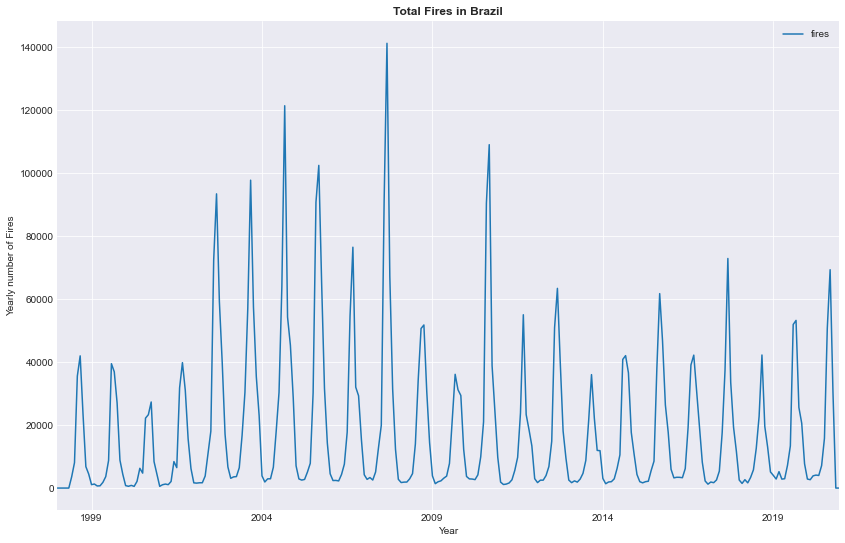

In [34]:
ax = brazil_series.set_index('date').plot(figsize=(14, 9))
plt.title("Total Fires in Brazil", fontweight='bold')
ax.set_ylabel('Yearly number of Fires')
ax.set_xlabel('Year')
plt.show()

### Tryingone state plot

In [35]:
#Criando
n_by_state_date = df.groupby(["state", "date"])["fires"].sum().reset_index()
print(n_by_state_date)


     state       date  fires
0       AC 1998-01-01      0
1       AC 1998-02-01      0
2       AC 1998-03-01      0
3       AC 1998-04-01      0
4       AC 1998-05-01      0
...    ...        ...    ...
7447    TO 2020-08-01   1714
7448    TO 2020-09-01   3977
7449    TO 2020-10-01   1621
7450    TO 2020-11-01      0
7451    TO 2020-12-01      0

[7452 rows x 3 columns]


In [36]:
#definindo variaveis
estados = "AC"

In [37]:
um_estado = n_by_state_date.loc[n_by_state_date['state'] == estados].loc[:, 'date': 'fires'].set_index('date')
um_estado

,fires
date,
1998-01-01,0
1998-02-01,0
1998-03-01,0
1998-04-01,0
1998-05-01,0
...,...
2020-08-01,3578
2020-09-01,3357
2020-10-01,1429


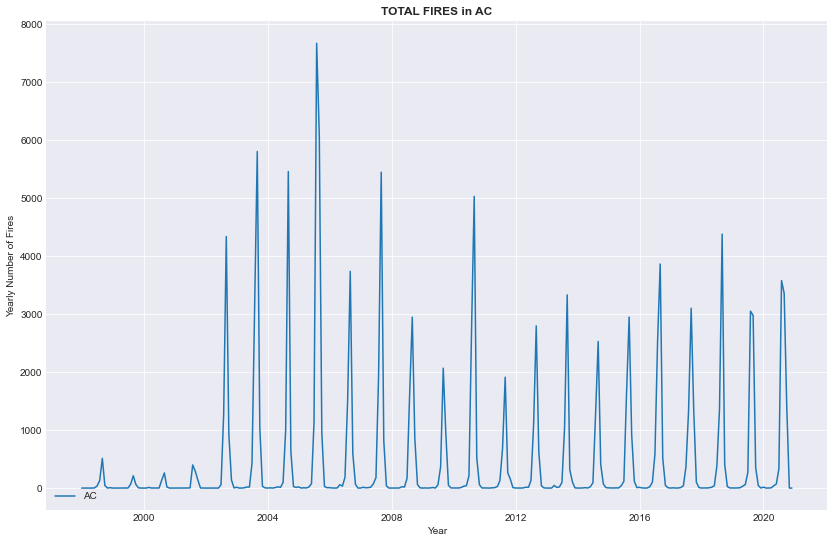

In [38]:
plt.plot(um_estado, label = estados)
plt.title("TOTAL FIRES in "+estados, fontweight='bold')
plt.legend(loc='lower left')
plt.ylabel('Yearly Number of Fires')
plt.xlabel('Year')
plt.show()

### Trying all states plot

In [39]:
#definindo variaveis
estados = n_by_state_date['state'].unique()

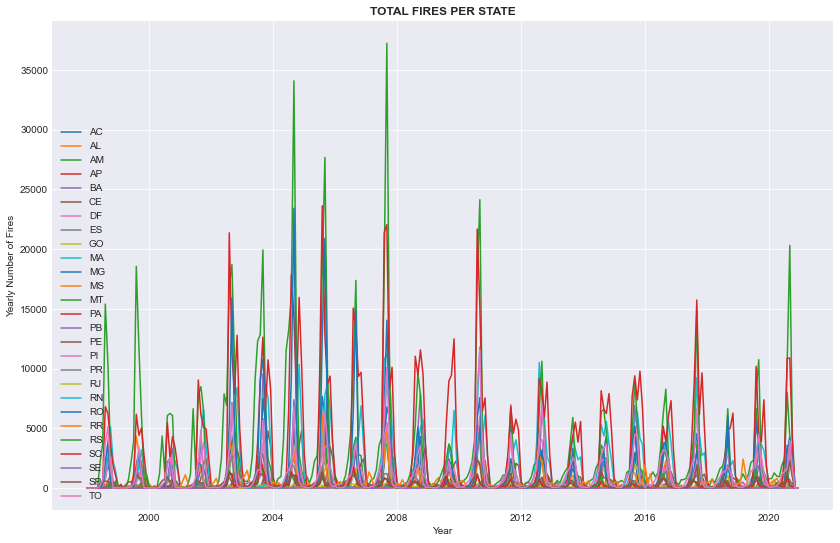

In [40]:
#plot no mesmo grafico
for i in estados:
    um_estado = n_by_state_date.loc[n_by_state_date['state'] == i].loc[:, 'date': 'fires'].set_index('date')
    plt.plot(um_estado, label=i)

#completando o grafico
plt.title("TOTAL FIRES PER STATE", fontweight='bold')
plt.legend(loc='lower left')
plt.ylabel('Yearly Number of Fires')
plt.xlabel('Year')
plt.show()